In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

In [ ]:
diabetes_data= pd.read_csv('/content/diabetes.csv')


In [ ]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:

X = diabetes_data.drop(columns='Outcome')
y = diabetes_data['Outcome']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

In [ ]:
pca_df

,PC1,PC2,target
0,1.068503,1.234895,1
1,-1.121683,-0.733852,0
2,-0.396477,1.595876,1
3,-1.115781,-1.271241,0
4,2.359334,-2.184819,1
...,...,...,...
763,1.562085,1.923150,0
764,-0.100405,-0.614181,0
765,-0.283475,0.097065,0
766,-1.060324,0.837062,1


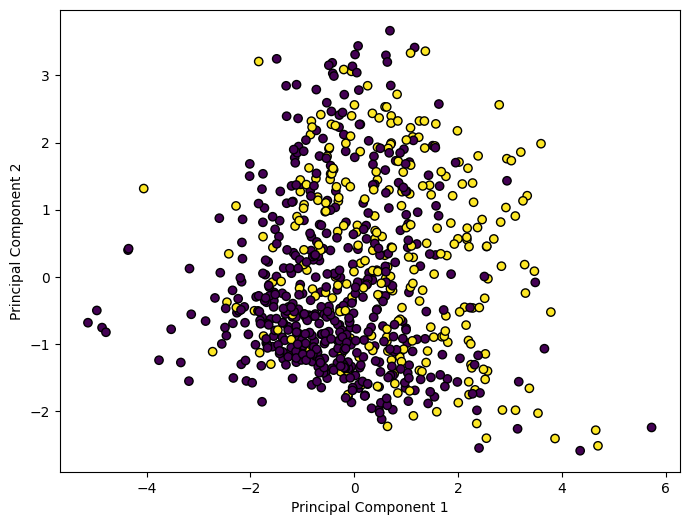

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['target'], cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7077922077922078

APPLY TSNE

In [ ]:
#apply t-sne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression

In [ ]:
diabetes_data= pd.read_csv('/content/diabetes.csv')


In [ ]:

X = diabetes_data[['Pregnancies','Glucose'	,'BloodPressure',	'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = diabetes_data['Outcome']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X )


In [ ]:
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_tsne,y,test_size=0.2,random_state=42)

In [ ]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.6818181818181818


In [ ]:
def predict_diabetes_data(Pregnancies,	Glucose	,BloodPressure,	SkinThickness,	Insulin,	BMI,	DiabetesPedigreeFunction	,Age):
    input_data = scaler.transform([[Pregnancies,	Glucose,	BloodPressure,	SkinThickness,	Insulin,	BMI,	DiabetesPedigreeFunction,	Age]])
    input_tsne = tsne.embedding_
    prediction = lg.predict(input_tsne)
    return diabetes_data.Outcome[prediction[0]]

In [ ]:
predict_diabetes_data(6,148,72,35,0,33.6,0.627,50)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0

In [ ]:
#SVD implementation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
diabetes_data= pd.read_csv('/content/diabetes.csv')


In [ ]:

X = diabetes_data[['Pregnancies','Glucose'	,'BloodPressure',	'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = diabetes_data['Outcome']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
svd = TruncatedSVD(n_components=2,random_state=42)
X_svd = svd.fit_transform(X_scaled)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_svd,y,test_size=0.2,random_state=42)

In [ ]:
lgs = LogisticRegression()
lgs.fit(X_train,y_train)
y_pred = lgs.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7077922077922078


In [ ]:
def predict_svd(Pregnancies,	Glucose	,BloodPressure,	SkinThickness,	Insulin,	BMI,	DiabetesPedigreeFunction	,Age):
  input_data = scaler.transform([[Pregnancies,	Glucose	,BloodPressure,	SkinThickness,	Insulin,	BMI,	DiabetesPedigreeFunction	,Age]])
  input_svd = svd.transform(input_data)
  prediction = lgs.predict(input_svd)
  # Assuming 'diabetes_data' is a scikit-learn dataset with a 'target_names' attribute
  if hasattr(diabetes_data, 'target_names'):
    return diabetes_data.target_names[prediction[0]]
  # Otherwise, return the prediction directly
  else:
    return prediction[0]

In [ ]:
predict_svd(6,148,72,35,0,33.6,0.627,50)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1